In [1]:
#### Load packages
import numpy as np
import pandas as pd
import scanpy as sc

from python_utils import *

In [2]:
sc.settings.verbosity = 0    # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.0.1 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [3]:
### Load the pbmc3k dataset
adata = sc.datasets.pbmc3k()

/Users/greta_bordin/opt/anaconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


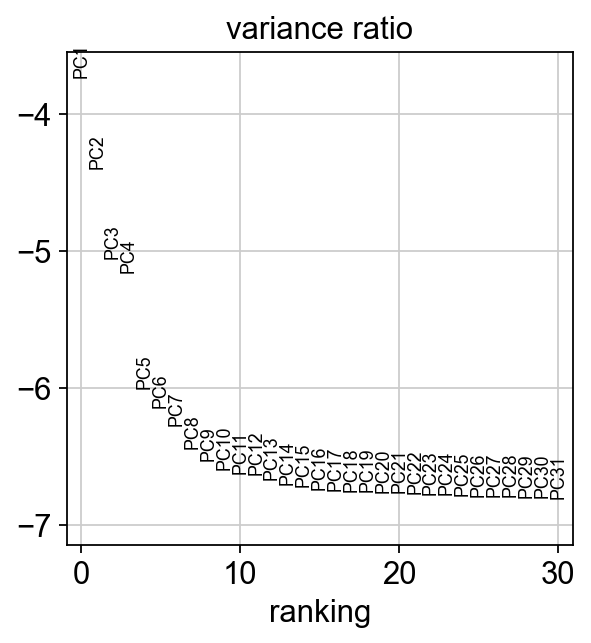

In [9]:
# preprocessing
# filtering -
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# qc- removal of cells with high fraction of mito genes or too many total counts
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

# total-counts normalisation
sc.pp.normalize_total(adata, target_sum=1e4)

# log- transform
sc.pp.log1p(adata)

# PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

# KNN graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# UMAP
sc.tl.umap(adata)

# leiden clustering
sc.tl.leiden(adata, resolution = 0.4)

### AUC from gene scoring

/Users/greta_bordin/opt/anaconda3/envs/lab/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


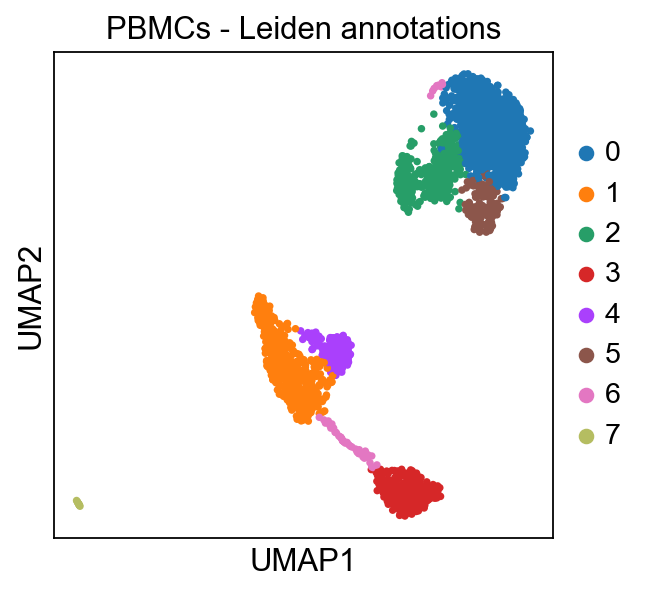

In [26]:
sc.pl.umap(adata, color = 'leiden', title='PBMCs - Leiden annotations')

In [27]:
res=get_cluster_genes(adata, "leiden", "t-test", clust_label=None)

Performing differential expression test for 2
416
Performing differential expression test for 3
358
Performing differential expression test for 0
1017
Performing differential expression test for 1
1096
Performing differential expression test for 5
83
Performing differential expression test for 6
447
Performing differential expression test for 4
1073
Performing differential expression test for 7
91


In [29]:
get_cluster_gene_score(adata, '3', res['3'])

AnnData object with n_obs × n_vars = 2638 × 13656
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'score', 'score_3'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

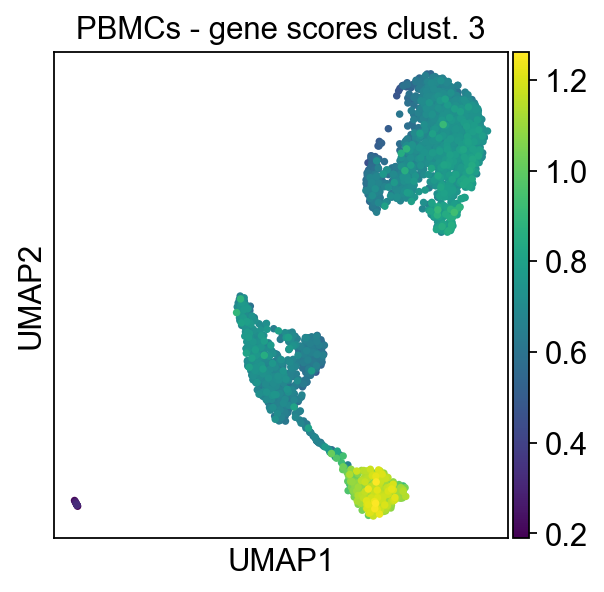

In [30]:
sc.pl.umap(adata, color = 'score_3', title='PBMCs - gene scores clust. 3')

Running main_test_DE_method for method=t-test
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 2
416
Performing differential expression test for 3
358
Performing differential expression test for 0
1017
Performing differential expression test for 1
1096
Performing differential expression test for 5
83
Performing differential expression test for 6
447
Performing differential expression test for 4
1073
Performing differential expression test for 7
91
Retrieving avg AUC
0
0.9890214087011385
1
0.9661671665398333
2
0.995338471849866
3
0.9997893797364877
4
0.9911900528979155
5
0.9723427590482094
6
0.985912922886026
7
1.0
Performing differential expression test for 2
403
Performing differential expression test for 3
357
Performing differential expression test for 0
950
P

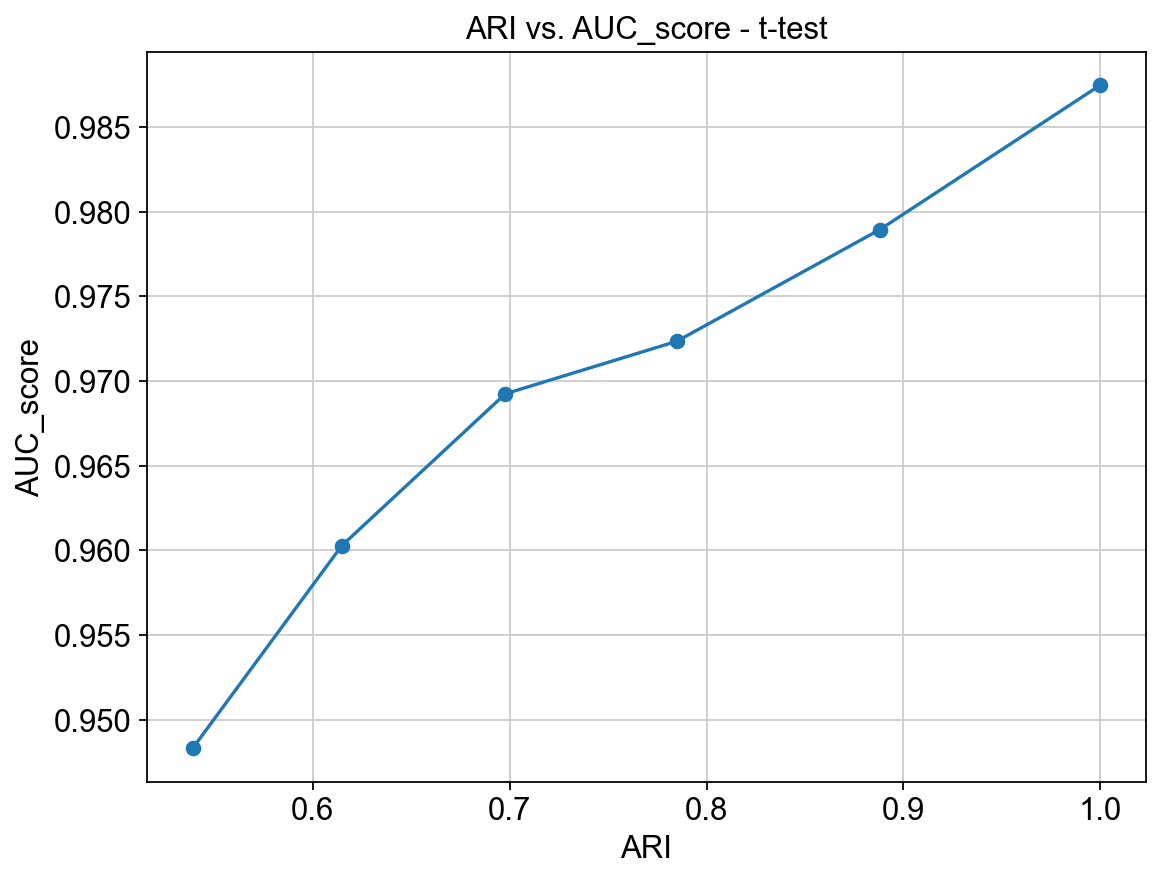

Running main_test_DE_method for method=t-test_overestim_var
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 2
257
Performing differential expression test for 3
284
Performing differential expression test for 0
884
Performing differential expression test for 1
858
Performing differential expression test for 5
64
Performing differential expression test for 6
19
Performing differential expression test for 4
613
Performing differential expression test for 7
28
Retrieving avg AUC
0
0.9886246857284885
1
0.9714764537356193
2
0.9961260053619303
3
0.9997906961131346
4
0.9929951908503265
5
0.948419841686138
6
0.8806612897339514
7
1.0
Performing differential expression test for 2
257
Performing differential expression test for 3
282
Performing differential expression test 

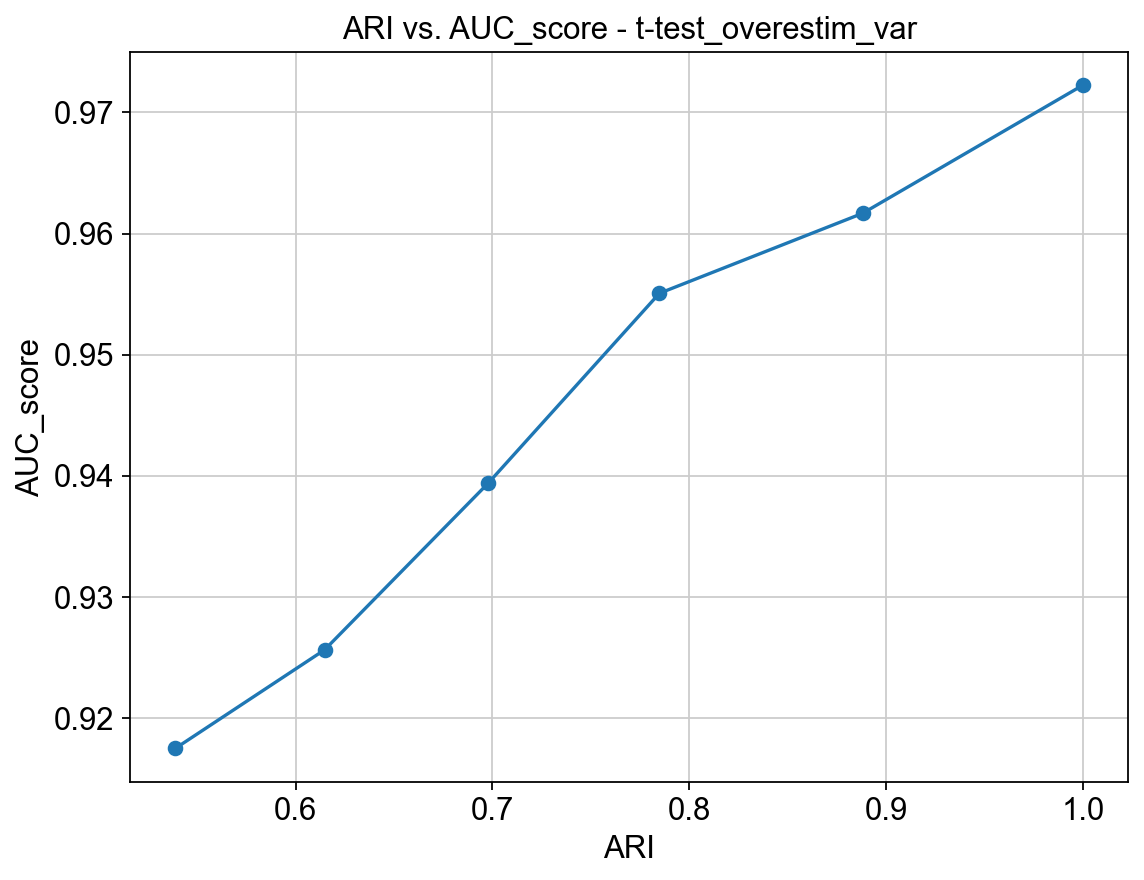

Running main_test_DE_method for method=wilcoxon
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 2
190
Performing differential expression test for 3
254
Performing differential expression test for 0
414
Performing differential expression test for 1
470
Performing differential expression test for 5
111
Performing differential expression test for 6
75
Performing differential expression test for 4
493
Performing differential expression test for 7
81
Retrieving avg AUC
0
0.9826266406645827
1
0.9727130802632168
2
0.9929926273458446
3
0.9994616019513968
4
0.9931290059179031
5
0.9378993610223642
6
0.9186890989379949
7
1.0
Performing differential expression test for 2
178
Performing differential expression test for 3
255
Performing differential expression test for 0
375


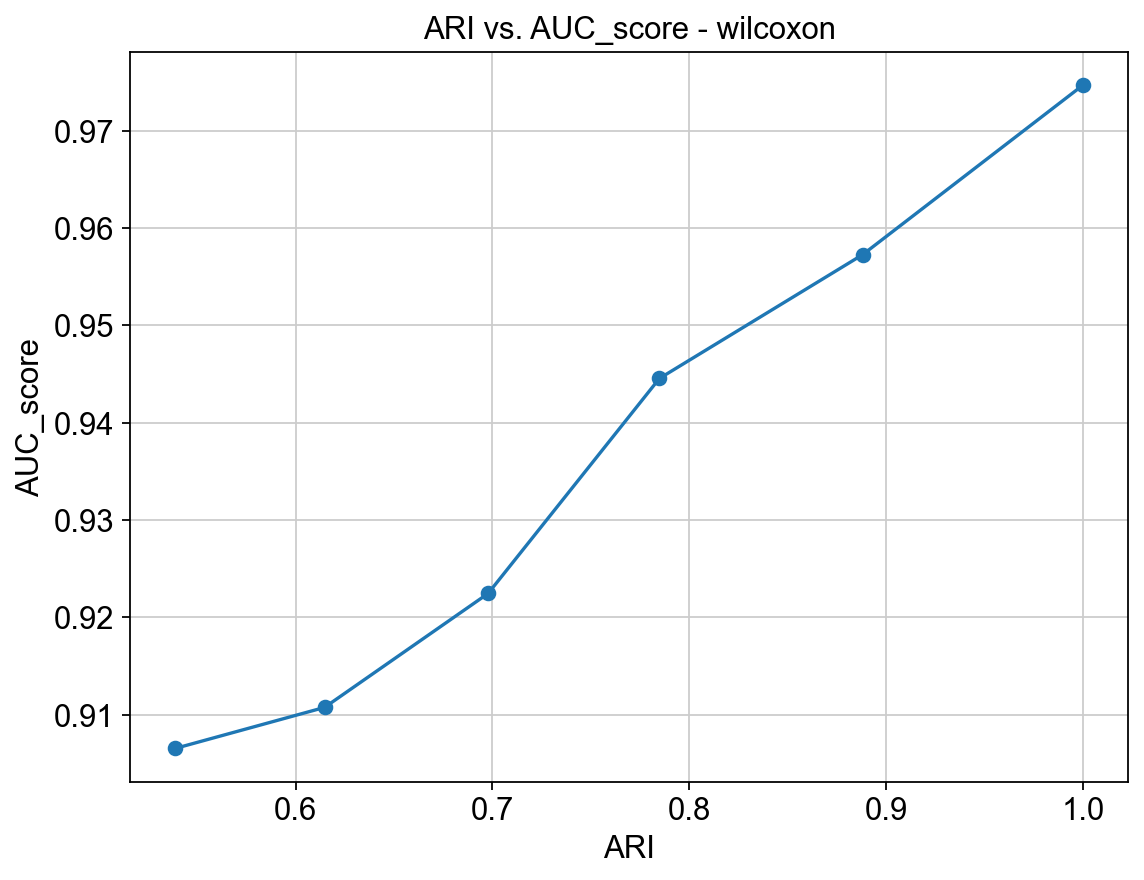

Running main_test_DE_method for method=diffxpy
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 2
Performing differential expression test for 3
Performing differential expression test for 0
Performing differential expression test for 1
Performing differential expression test for 5
Performing differential expression test for 6
Performing differential expression test for 4
Performing differential expression test for 7
Retrieving avg AUC
0
0.9890327607139101
1
0.9661671665398333
2
0.995338471849866
3
0.9997893797364877
4
0.991116318064761
5
0.9723427590482094
6
0.9868544943615196
7
1.0
Performing differential expression test for 2
Performing differential expression test for 3
Performing differential expression test for 0
Performing differential expression test for 1

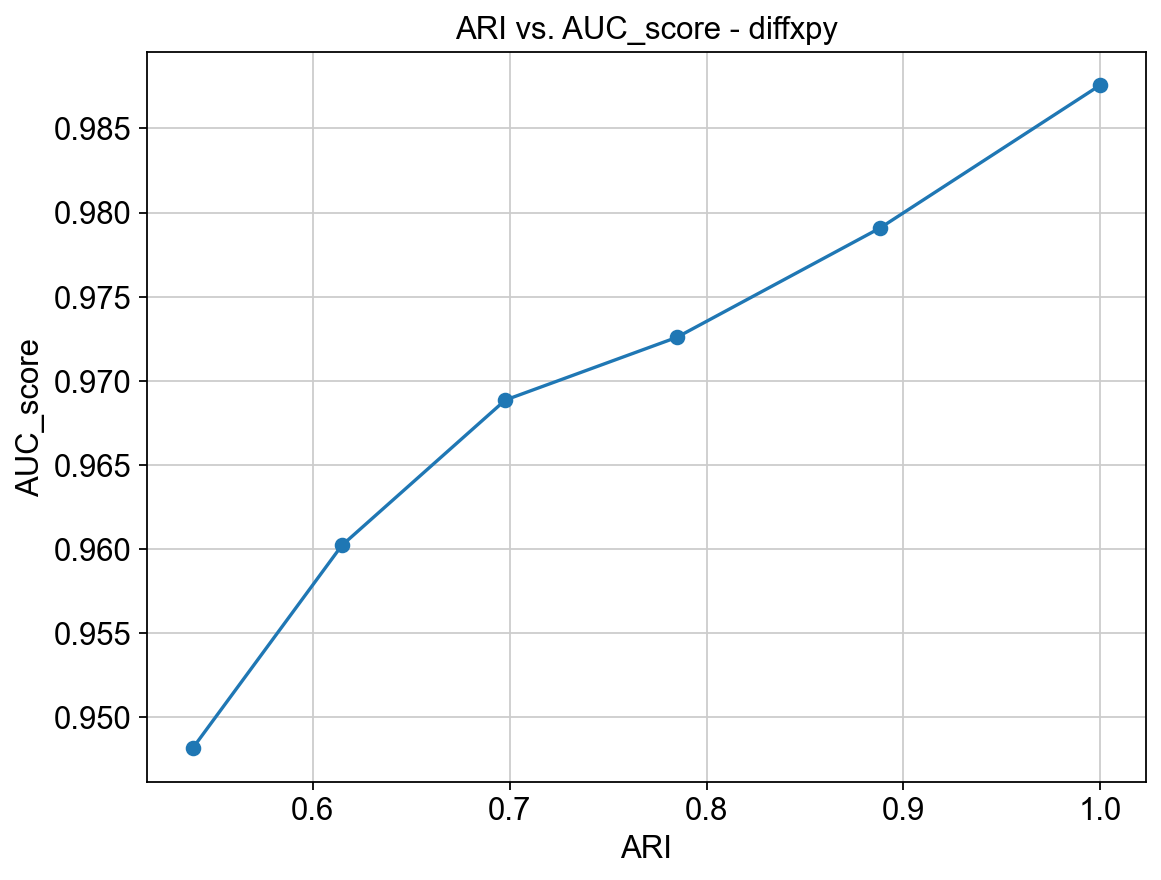

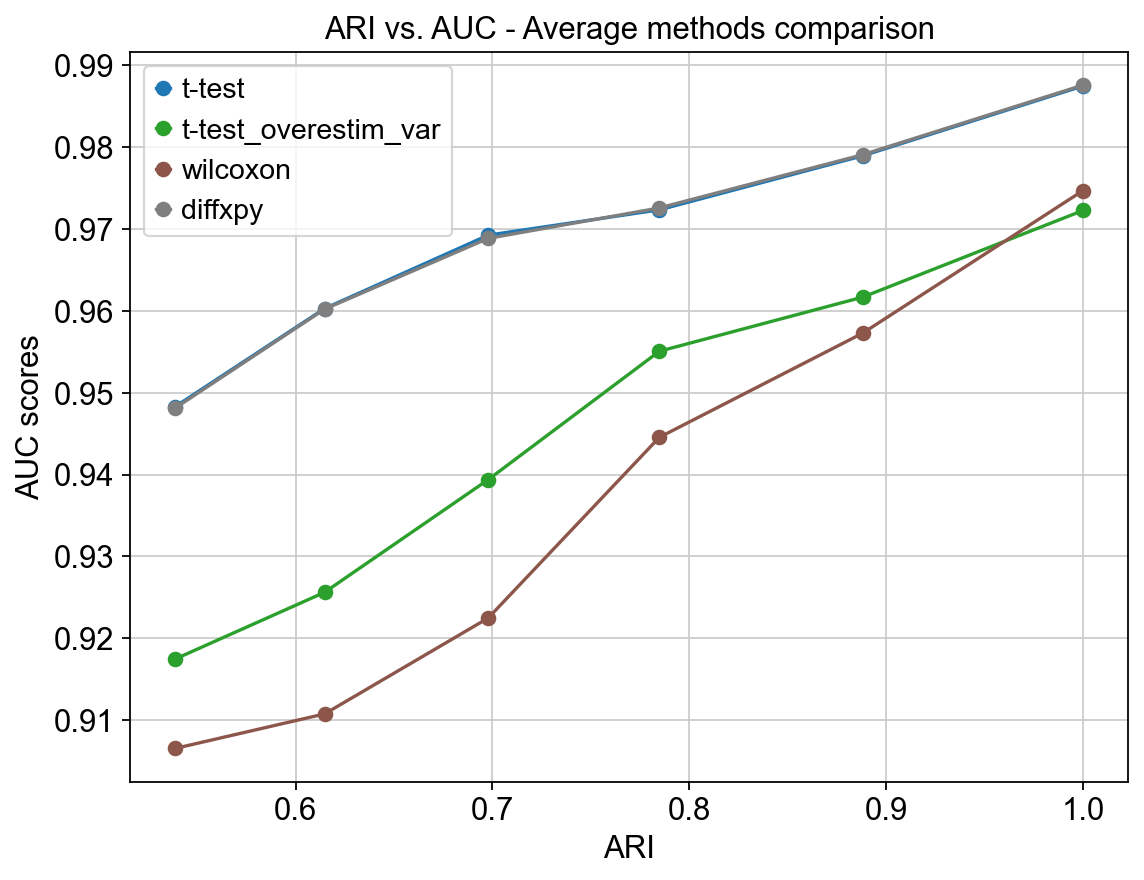

In [32]:
### global wrapper AUC
error_perc = [0, 5, 10, 15, 20, 25]
tests = ["t-test","t-test_overestim_var","wilcoxon","diffxpy"]

plot_ari_AUC_methods_comparison_wrapper(adata, error_perc,'leiden', tests, clust_label=None)

Running main_test_DE_method for clust_label=2
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 2
416
Retrieving avg AUC
2
0.995338471849866
Performing differential expression test for 2
403
Retrieving avg AUC
2
0.9818369187169909
Performing differential expression test for 2
390
Retrieving avg AUC
2
0.9716173307931628
Performing differential expression test for 2
361
Retrieving avg AUC
2
0.9638519880388747
Performing differential expression test for 2
358
Retrieving avg AUC
2
0.9490884904272247
Performing differential expression test for 2
344
Retrieving avg AUC
2
0.9384298065590254


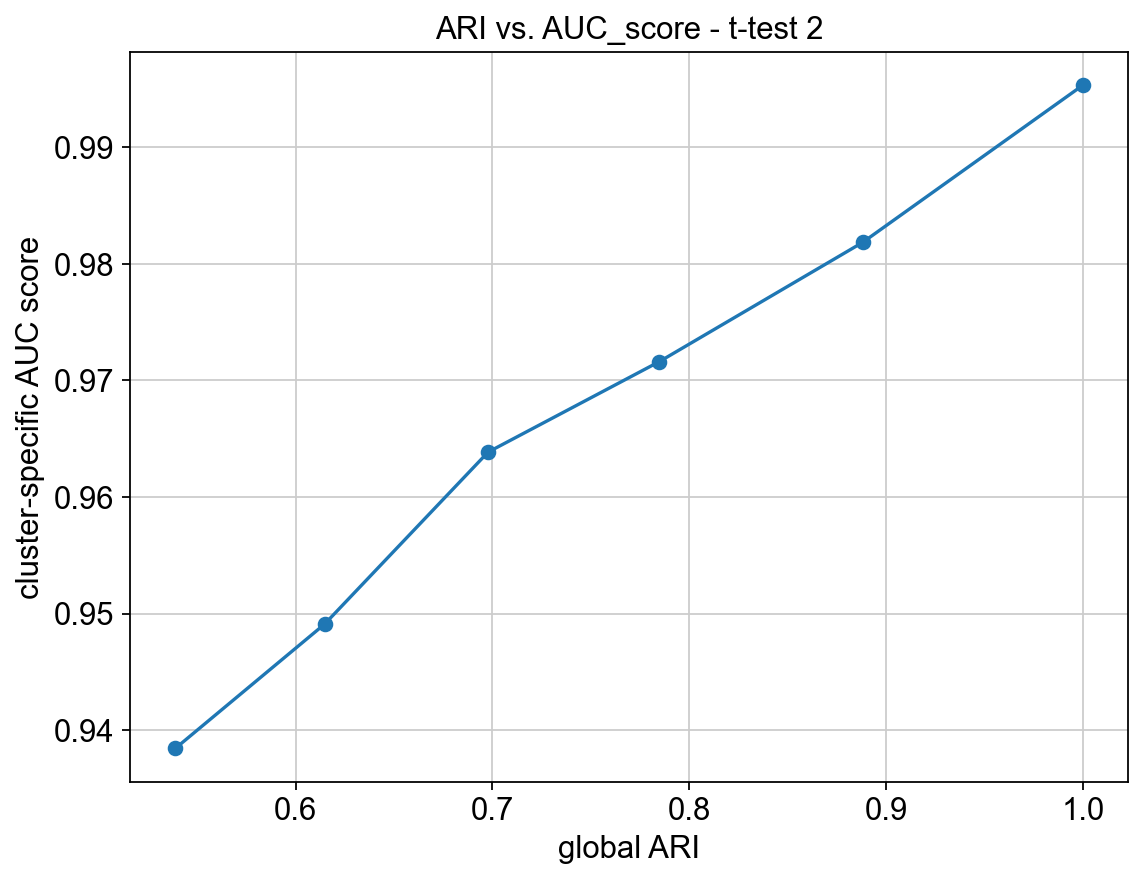

Running main_test_DE_method for clust_label=3
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 3
358
Retrieving avg AUC
3
0.9997893797364877
Performing differential expression test for 3
357
Retrieving avg AUC
3
0.9997809101467637
Performing differential expression test for 3
364
Retrieving avg AUC
3
0.9998403019744483
Performing differential expression test for 3
365
Retrieving avg AUC
3
0.9995500842268793
Performing differential expression test for 3
358
Retrieving avg AUC
3
0.9992718759051267
Performing differential expression test for 3
354
Retrieving avg AUC
3
0.9973315706018566


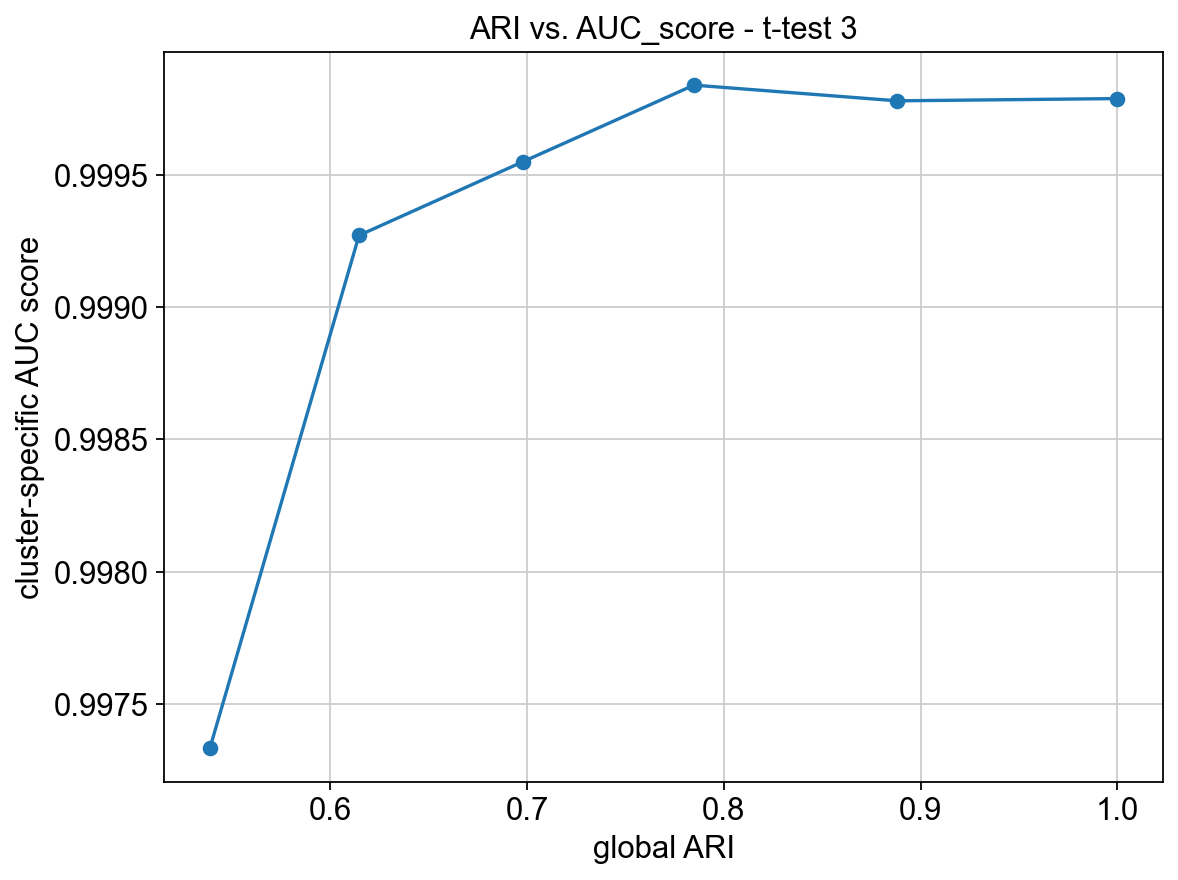

Running main_test_DE_method for clust_label=0
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 0
1017
Retrieving avg AUC
0
0.9890214087011385
Performing differential expression test for 0
950
Retrieving avg AUC
0
0.9770222191005794
Performing differential expression test for 0
924
Retrieving avg AUC
0
0.9698469631319998
Performing differential expression test for 0
908
Retrieving avg AUC
0
0.9607915347928183
Performing differential expression test for 0
848
Retrieving avg AUC
0
0.952055435043705
Performing differential expression test for 0
788
Retrieving avg AUC
0
0.9381402395036791


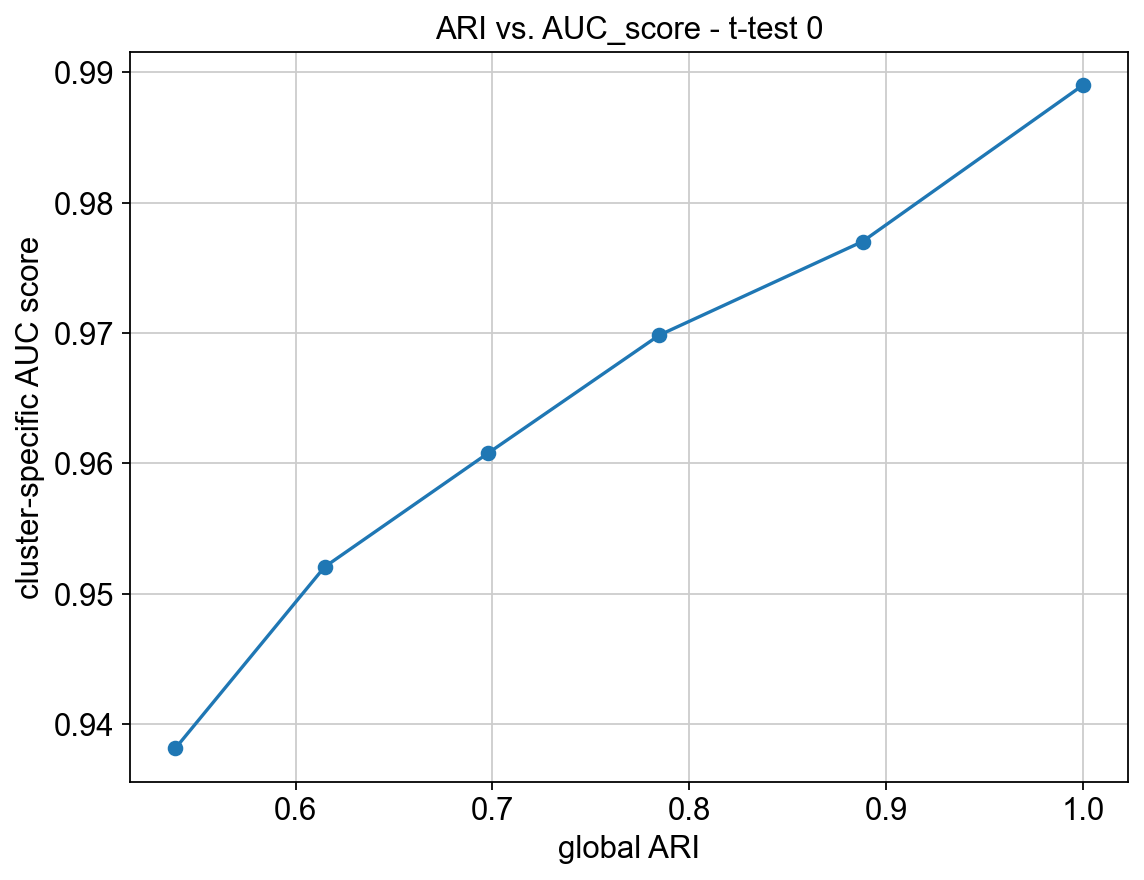

Running main_test_DE_method for clust_label=1
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 1
1096
Retrieving avg AUC
1
0.9661671665398333
Performing differential expression test for 1
1089
Retrieving avg AUC
1
0.964977549111319
Performing differential expression test for 1
1110
Retrieving avg AUC
1
0.9639346602496125
Performing differential expression test for 1
1141
Retrieving avg AUC
1
0.9642622221895579
Performing differential expression test for 1
1122
Retrieving avg AUC
1
0.9618970334815534
Performing differential expression test for 1
1124
Retrieving avg AUC
1
0.9599012221897294


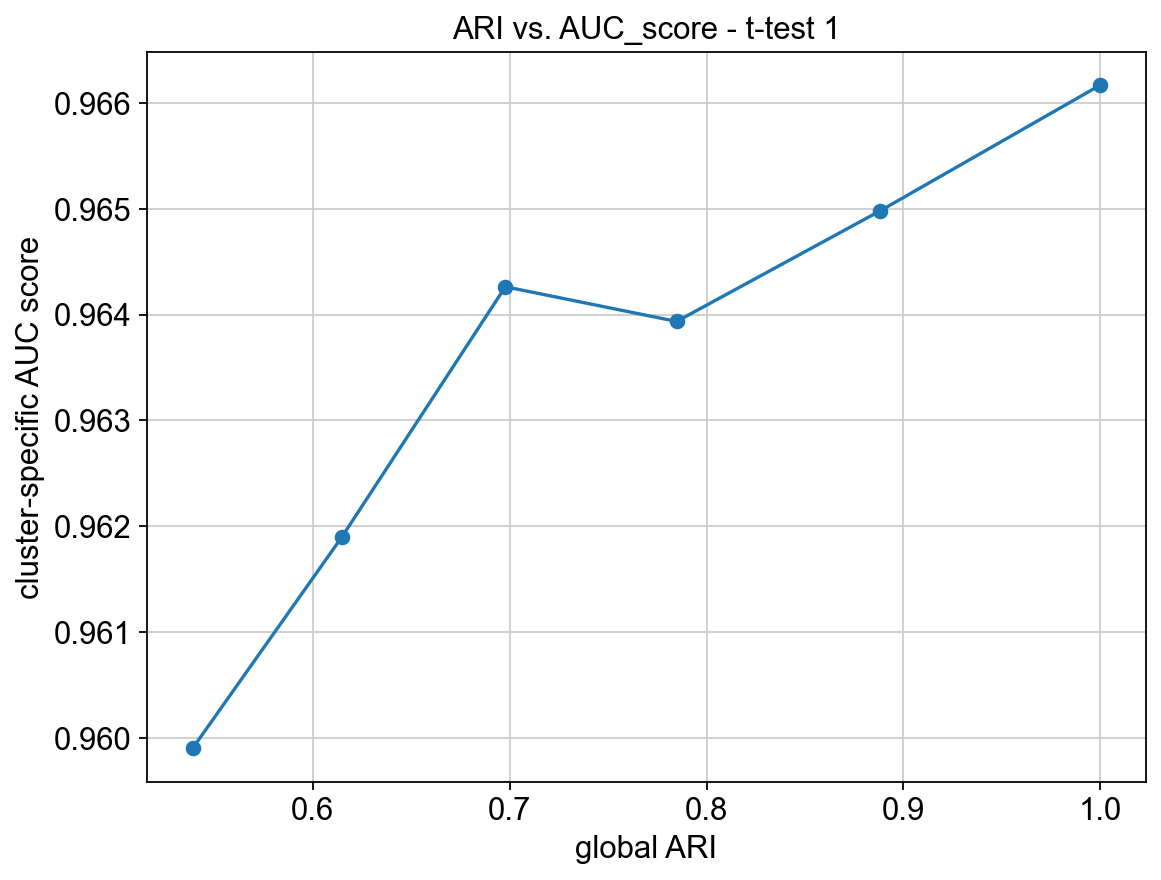

Running main_test_DE_method for clust_label=5
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 5
83
Retrieving avg AUC
5
0.9723427590482094
Performing differential expression test for 5
83
Retrieving avg AUC
5
0.944072088768883
Performing differential expression test for 5
86
Retrieving avg AUC
5
0.9142673402343023
Performing differential expression test for 5
87
Retrieving avg AUC
5
0.92267705811138
Performing differential expression test for 5
85
Retrieving avg AUC
5
0.886359595787198
Performing differential expression test for 5
92
Retrieving avg AUC
5
0.8346749226006193


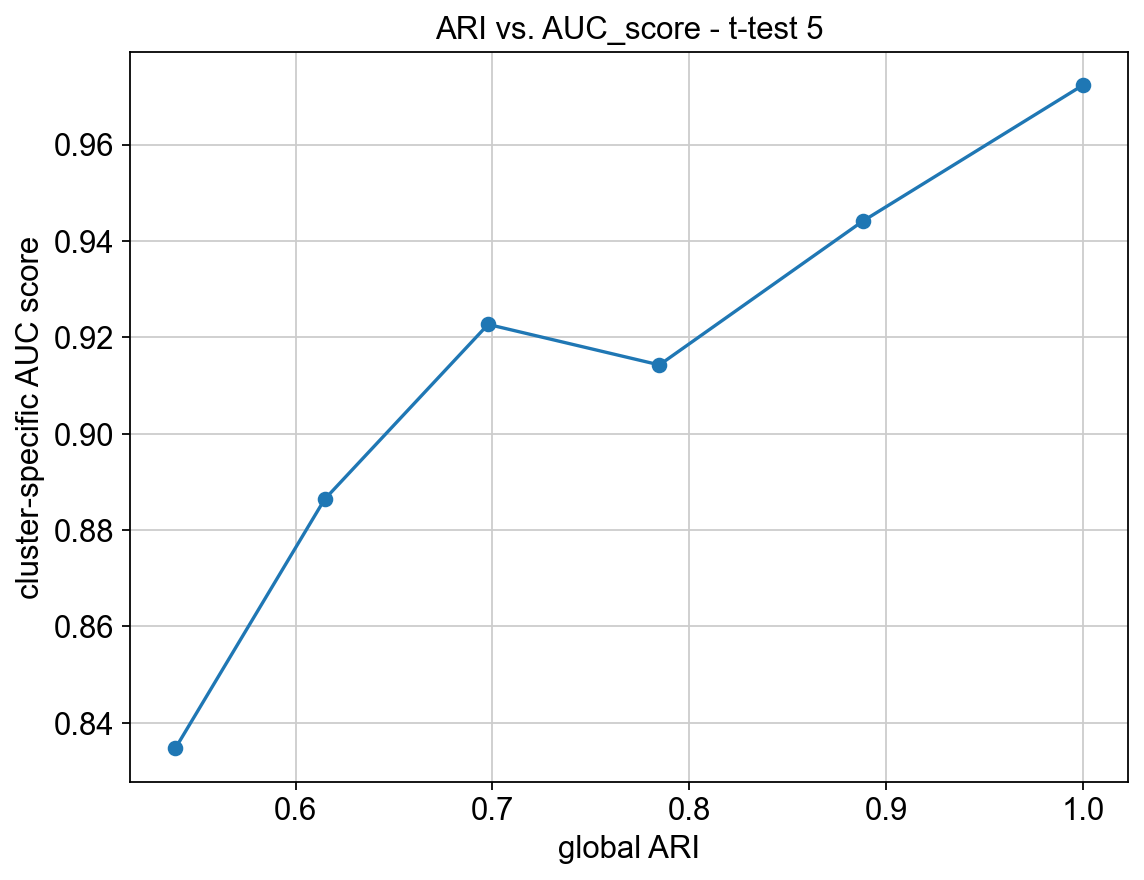

Running main_test_DE_method for clust_label=6
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 6
447
Retrieving avg AUC
6
0.985912922886026
Performing differential expression test for 6
435
Retrieving avg AUC
6
0.9763211335361887
Performing differential expression test for 6
349
Retrieving avg AUC
6
0.9726952184382525
Performing differential expression test for 6
295
Retrieving avg AUC
6
0.9570060659433101
Performing differential expression test for 6
247
Retrieving avg AUC
6
0.948249027237354
Performing differential expression test for 6
221
Retrieving avg AUC
6
0.9380673689686565


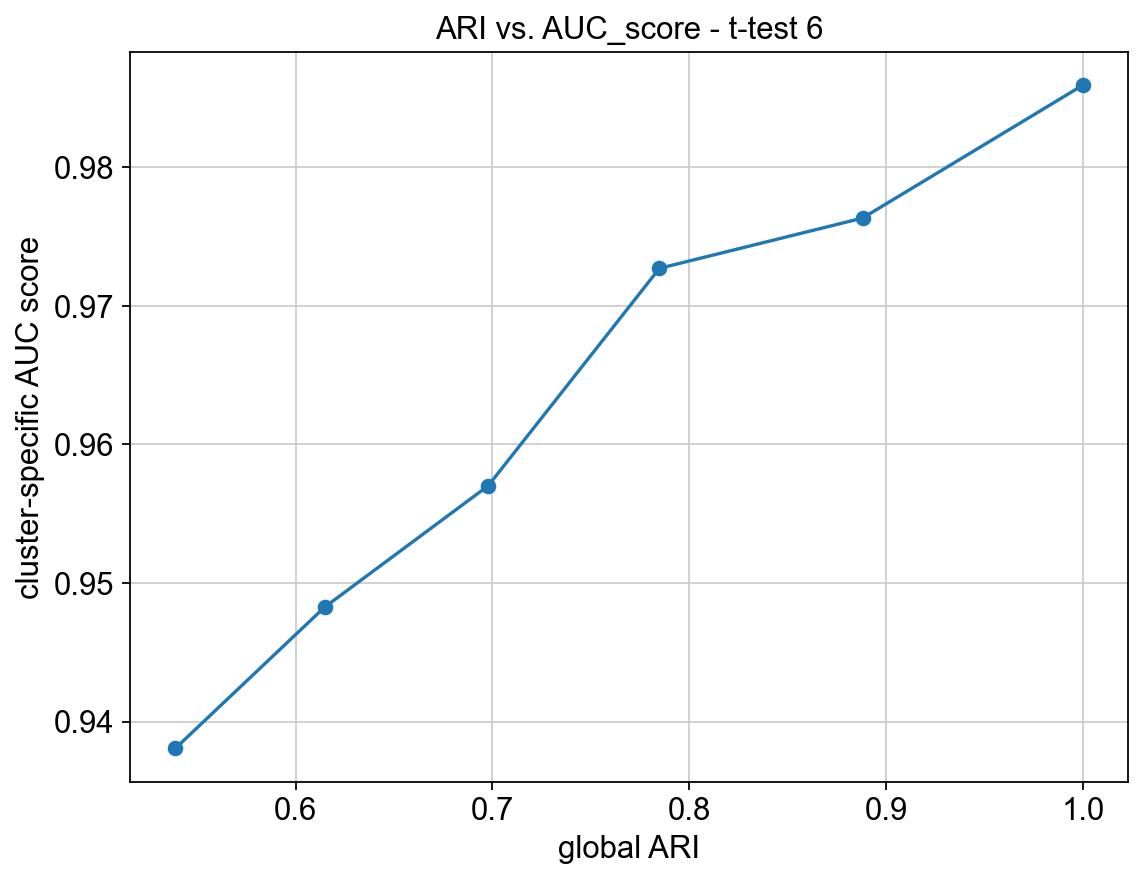

Running main_test_DE_method for clust_label=4
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 4
1073
Retrieving avg AUC
4
0.9911900528979155
Performing differential expression test for 4
1032
Retrieving avg AUC
4
0.9874814638822209
Performing differential expression test for 4
1037
Retrieving avg AUC
4
0.9865297027621677
Performing differential expression test for 4
975
Retrieving avg AUC
4
0.9858172285700851
Performing differential expression test for 4
984
Retrieving avg AUC
4
0.9852999952978794
Performing differential expression test for 4
985
Retrieving avg AUC
4
0.9799096419993139


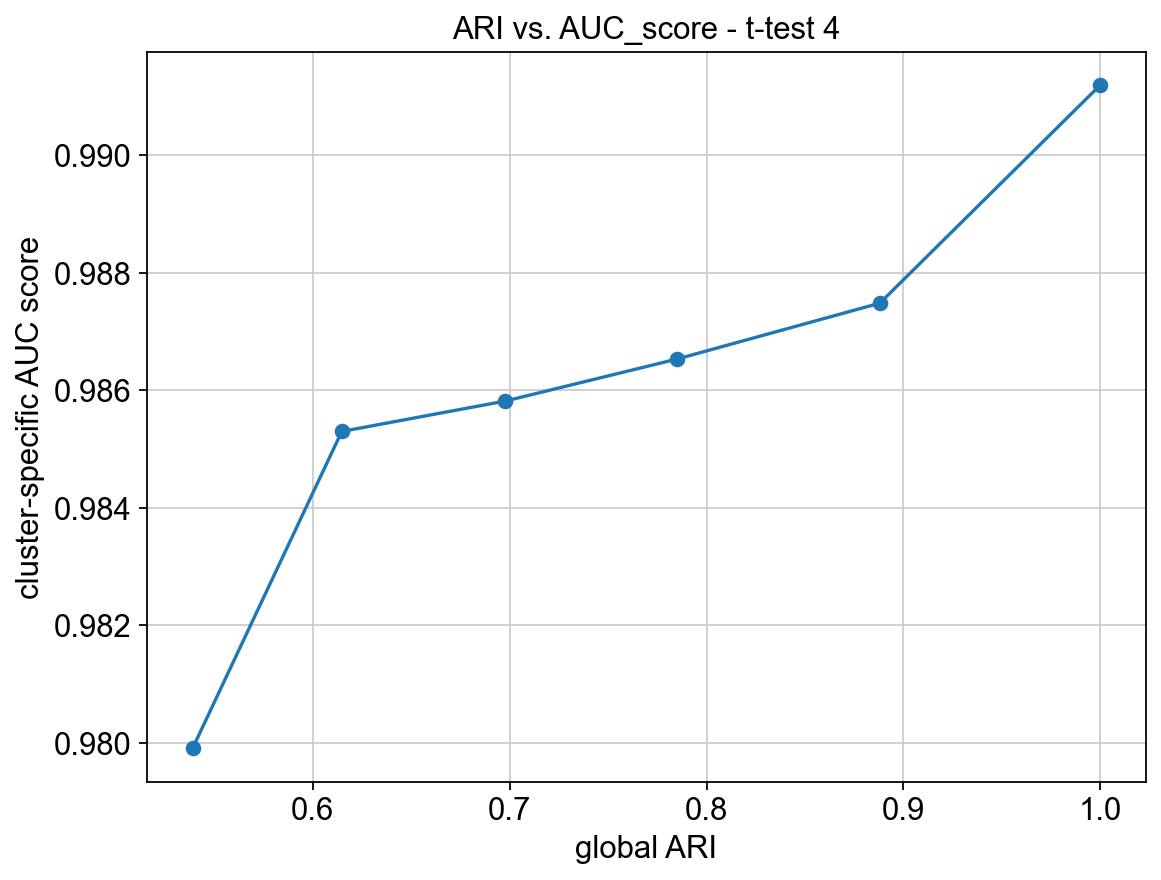

Running main_test_DE_method for clust_label=7
Running clust_error with percentage=0
Running clust_error with percentage=5
Running clust_error with percentage=10
Running clust_error with percentage=15
Running clust_error with percentage=20
Running clust_error with percentage=25
Performing differential expression test for 7
91
Retrieving avg AUC
7
1.0
Performing differential expression test for 7
91
Retrieving avg AUC
7
1.0
Performing differential expression test for 7
91
Retrieving avg AUC
7
1.0
Performing differential expression test for 7
91
Retrieving avg AUC
7
1.0
Performing differential expression test for 7
91
Retrieving avg AUC
7
1.0
Performing differential expression test for 7
91
Retrieving avg AUC
7
1.0


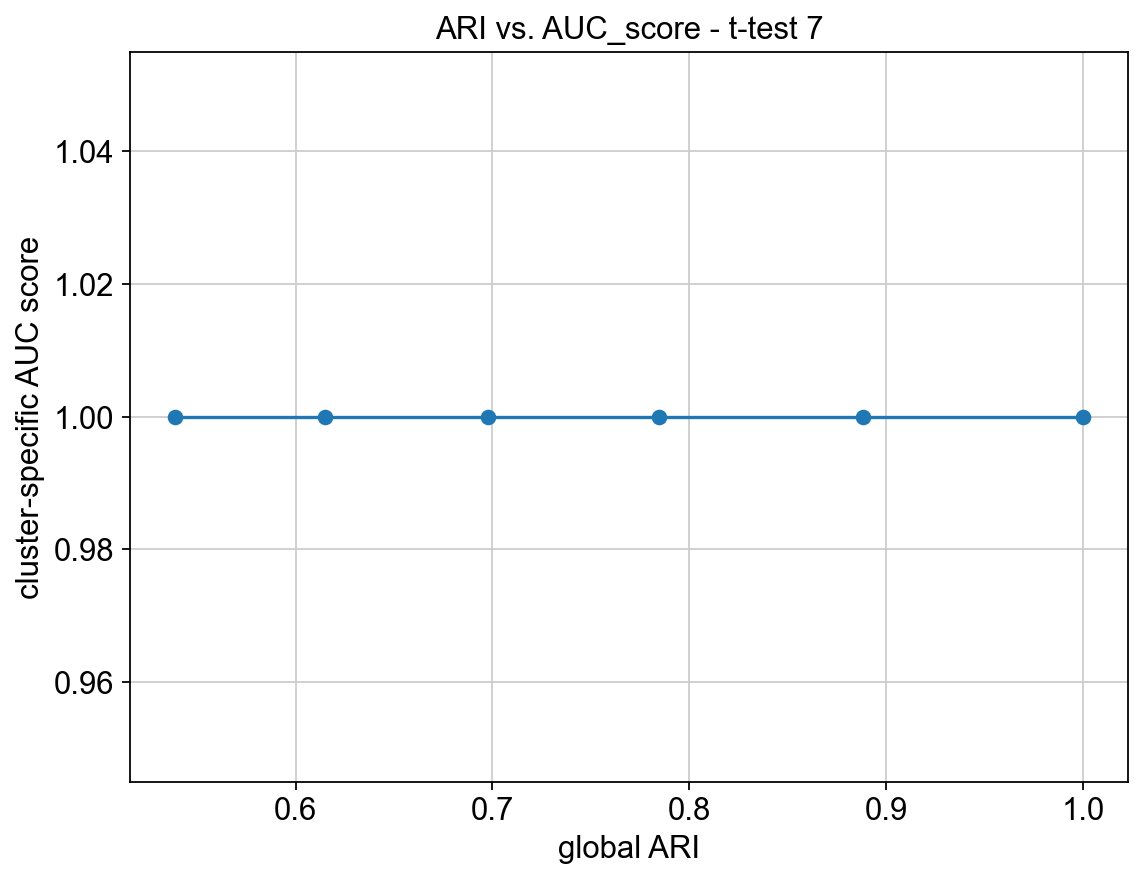

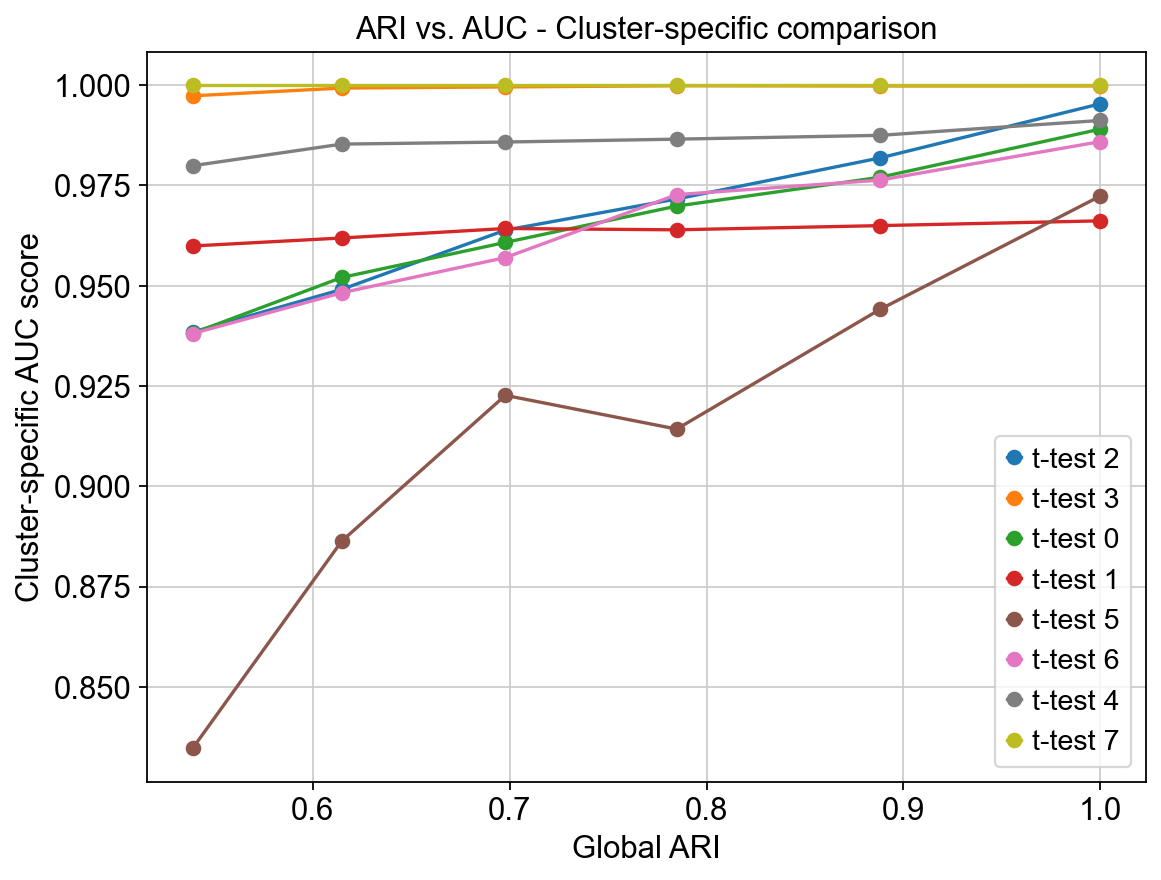

In [33]:
error_perc = [0, 5, 10, 15, 20, 25]
plot_ari_AUC_auto_clust_labels_comparison_wrapper(adata, error_perc, 'leiden', 't-test')